In [182]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

In [10]:
indicators = pd.read_csv('./world-development-indicators/Indicators.csv')

In [217]:
indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [212]:
filteredC02 = indicators['IndicatorName'] == 'CO2 emissions (metric tons per capita)' 
filteredPop = indicators['IndicatorName'] == 'Population, total'
filteredLife = indicators['IndicatorName'] == 'Life expectancy at birth, total (years)'
filteredExp = indicators['IndicatorName'] == 'Merchandise exports (current US$)'
filteredYear = indicators[(indicators.Year >= 1990)  & (indicators.Year <= 2015)]
filteredYear.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1880402,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,7.544751e+01
1880403,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1990,5.868064e+01
1880404,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,1990,9.184235e+01
1880405,Arab World,ARB,Access to non-solid fuel (% of population),EG.NSF.ACCS.ZS,1990,7.422351e+01
1880406,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,1990,7.210472e+01
1880407,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,1990,6.530609e+01
1880408,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,1990,7.864871e+01
1880409,Arab World,ARB,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,1990,3.516367e+11
1880410,Arab World,ARB,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1990,1.584457e+03
1880411,Arab World,ARB,"Adjusted net savings, excluding particulate em...",NY.ADJ.SVNX.GN.ZS,1990,2.432691e+00


In [194]:
dfC02 = indicators[filteredC02]
dfPop = indicators[filteredPop]
dfLife = indicators[filteredLife]
dfExp = indicators[filteredExp]
dfExp.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
23,Arab World,ARB,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,1960,4.645919e+09
104,Caribbean small states,CSS,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,1960,6.237171e+08
283,East Asia & Pacific (all income levels),EAS,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,1960,1.531711e+10
403,East Asia & Pacific (developing only),EAP,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,1960,6.249855e+09
536,Euro area,EMU,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,1960,3.479041e+10


In [54]:
indicators.dftypes

CountryName       object
CountryCode       object
IndicatorName     object
IndicatorCode     object
Year               int64
Value            float64
dtype: object

In [460]:
joined1 = pd.merge(dfC02, dfPop, how = 'outer')
joined2 = pd.merge (joined1, dfLife, how = 'outer')
joined3 = pd.merge(joined2, dfExp, how = 'outer')
joined4 = pd.merge(joined3, dfPop, how = 'outer')
final = joined4[(joined4.Year >= 1990)  & (joined4.Year <= 2011)]
final.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5670,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,3.203907
5671,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,5.367886
5672,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,8.847908
5673,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,2.600991
5674,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,1.803359


In [142]:
final.transpose()

,5670,5671,5672,5673,5674,5675,5676,5677,5678,5679,...,46929,46930,46931,46932,46933,46934,46935,46936,46937,46938
CountryName,Arab World,Caribbean small states,Central Europe and the Baltics,East Asia & Pacific (all income levels),East Asia & Pacific (developing only),Euro area,European Union,Fragile and conflict affected situations,Heavily indebted poor countries (HIPC),High income,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,"Yemen, Rep.",Zambia,Zimbabwe
CountryCode,ARB,CSS,CEB,EAS,EAP,EMU,EUU,FCS,HPC,HIC,...,GBR,USA,URY,UZB,VUT,VEN,VNM,YEM,ZMB,ZWE
IndicatorName,CO2 emissions (metric tons per capita),CO2 emissions (metric tons per capita),CO2 emissions (metric tons per capita),CO2 emissions (metric tons per capita),CO2 emissions (metric tons per capita),CO2 emissions (metric tons per capita),CO2 emissions (metric tons per capita),CO2 emissions (metric tons per capita),CO2 emissions (metric tons per capita),CO2 emissions (metric tons per capita),...,Merchandise exports (current US$),Merchandise exports (current US$),Merchandise exports (current US$),Merchandise exports (current US$),Merchandise exports (current US$),Merchandise exports (current US$),Merchandise exports (current US$),Merchandise exports (current US$),Merchandise exports (current US$),Merchandise exports (current US$)
IndicatorCode,EN.ATM.CO2E.PC,EN.ATM.CO2E.PC,EN.ATM.CO2E.PC,EN.ATM.CO2E.PC,EN.ATM.CO2E.PC,EN.ATM.CO2E.PC,EN.ATM.CO2E.PC,EN.ATM.CO2E.PC,EN.ATM.CO2E.PC,EN.ATM.CO2E.PC,...,TX.VAL.MRCH.CD.WT,TX.VAL.MRCH.CD.WT,TX.VAL.MRCH.CD.WT,TX.VAL.MRCH.CD.WT,TX.VAL.MRCH.CD.WT,TX.VAL.MRCH.CD.WT,TX.VAL.MRCH.CD.WT,TX.VAL.MRCH.CD.WT,TX.VAL.MRCH.CD.WT,TX.VAL.MRCH.CD.WT
Year,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,...,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
Value,3.20391,5.36789,8.84791,2.60099,1.80336,8.24125,8.53993,0.758718,0.176142,11.4414,...,5.0657e+11,1.48251e+12,7.91175e+09,1.3254e+10,6.733e+07,9.2811e+10,9.69057e+10,9.7e+09,9.00095e+09,3.51212e+09


In [462]:
summary = final.groupby(['CountryName', 'IndicatorName'], as_index = False).agg({'Value':'mean'})
summary.transpose()
summary.head(10)

,CountryName,IndicatorName,Value
0,Afghanistan,CO2 emissions (metric tons per capita),1.158157e-01
1,Afghanistan,"Life expectancy at birth, total (years)",5.514472e+01
2,Afghanistan,Merchandise exports (current US$),2.672001e+08
3,Afghanistan,"Population, total",2.058324e+07
4,Albania,CO2 emissions (metric tons per capita),1.152550e+00
5,Albania,"Life expectancy at birth, total (years)",7.438587e+01
6,Albania,Merchandise exports (current US$),5.549526e+08
7,Albania,"Population, total",3.086820e+06
8,Algeria,CO2 emissions (metric tons per capita),3.080816e+00
9,Algeria,"Life expectancy at birth, total (years)",7.036701e+01


In [465]:
test = final.pivot_table(index = 'CountryName', columns = 'IndicatorName', values = 'Value')
test.head()

IndicatorName,CO2 emissions (metric tons per capita),"Life expectancy at birth, total (years)",Merchandise exports (current US$),"Population, total"
CountryName,,,,
Afghanistan,0.115816,55.144717,2.672001e+08,2.058324e+07
Albania,1.152550,74.385871,5.549526e+08,3.086820e+06
Algeria,3.080816,70.367010,2.936674e+10,3.133294e+07
American Samoa,NaN,NaN,3.634331e+08,5.521114e+04
Andorra,6.926680,NaN,NaN,7.085382e+04


In [348]:
test2 = test.dropna()

In [349]:
X = StandardScaler().fit_transform(test2)


In [200]:
kmeans = KMeans(n_clusters=10)
model = kmeans.fit(X)
print("model\n", model)
centers = model.cluster_centers_

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [204]:
features = ['CO2 emissions (metric tons per capita)', 'Life expectancy at birth, total (years)', 'Merchandise exports (current US$)', 'Population, total']



In [201]:
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')
    
	Z = [np.append(A, index) for index, A in enumerate(centers)]
    
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [207]:
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-10,+10])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [289]:
P = pd_centers(features, centers)


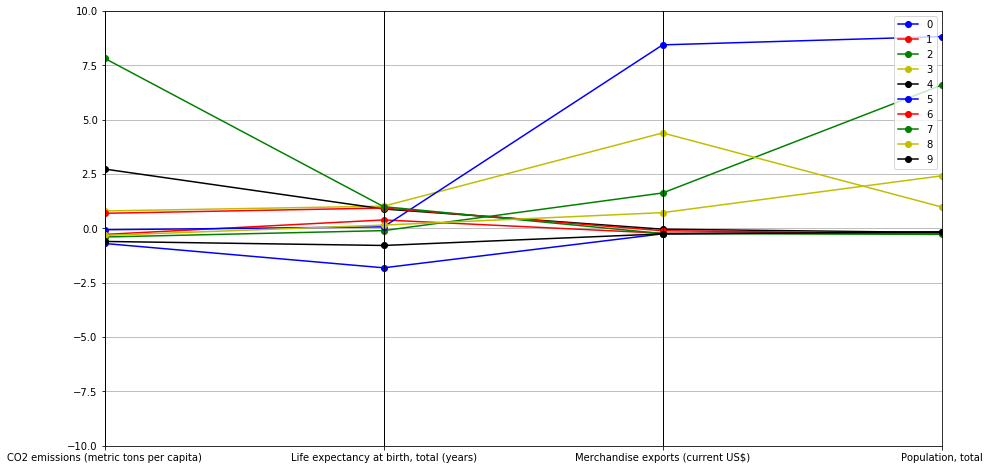

In [209]:
parallel_plot(P)

In [264]:
agri = pd.read_csv('./FAO.csv', encoding = "ISO-8859-1")

In [288]:
agri.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,10Year
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,45509.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,4995.0
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360,2721.0
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,880.0
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200,2084.0


In [266]:
agri['10Year']=agri['Y2003'] + agri['Y2004'] + agri['Y2005'] + agri['Y2006'] + agri['Y2007'] + agri['Y2008'] + agri['Y2009'] + agri['Y2010'] + agri['Y2011'] + agri['Y2012'] + agri['Y2013']
agri.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,10Year
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,45509.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,4995.0
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360,2721.0
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,880.0
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200,2084.0


In [322]:
summary2 =agri.groupby(['Area', 'Element'], as_index = False).agg({'10Year':'mean'})
summary2.head()

,Area,Element,10Year
0,Afghanistan,Feed,1373.800000
1,Afghanistan,Food,2766.917808
2,Albania,Feed,495.720000
3,Albania,Food,695.285714
4,Algeria,Feed,2758.772727


In [357]:
agri_final = summary2.pivot_table(index = 'Area', columns = 'Element', values = '10Year')
agri_final.reset_index(inplace=True)
agri_final.rename(columns={'Area': 'CountryName'}, inplace=True)
agri_final.head()

Element,CountryName,Feed,Food
0,Afghanistan,1373.800000,2766.917808
1,Albania,495.720000,695.285714
2,Algeria,2758.772727,5487.352941
3,Angola,8212.266667,2590.872340
4,Antigua and Barbuda,0.307692,11.711538


In [496]:
indFinal = test2.drop(['Life expectancy at birth, total (years)', 'Merchandise exports (current US$)'], axis=1)
indFinal.reset_index(inplace=True)
indFinal.head()

IndicatorName,CountryName,CO2 emissions (metric tons per capita),"Population, total"
0,Afghanistan,0.115816,2.058324e+07
1,Albania,1.152550,3.086820e+06
2,Algeria,3.080816,3.133294e+07
3,Angola,0.820365,1.583110e+07
4,Antigua and Barbuda,4.937855,7.622632e+04


In [408]:
agri_finalset = pd.merge(agri_final, indFinal, how = 'left')
agri_finalset.head()
plot_data = agri_finalset.assign(TotalFood = agri_finalset.Feed + agri_finalset.Food) 
plot_data2 = plot_data.assign(PercentFeed = plot_data.Feed / plot_data.TotalFood * 100)
plot_data2.head()

,CountryName,Feed,Food,CO2 emissions (metric tons per capita),"Population, total",TotalFood,PercentFeed
0,Afghanistan,1373.800000,2766.917808,0.115816,2.058324e+07,4140.717808,33.177822
1,Albania,495.720000,695.285714,1.152550,3.086820e+06,1191.005714,41.621967
2,Algeria,2758.772727,5487.352941,3.080816,3.133294e+07,8246.125668,33.455381
3,Angola,8212.266667,2590.872340,0.820365,1.583110e+07,10803.139007,76.017412
4,Antigua and Barbuda,0.307692,11.711538,4.937855,7.622632e+04,12.019231,2.560000


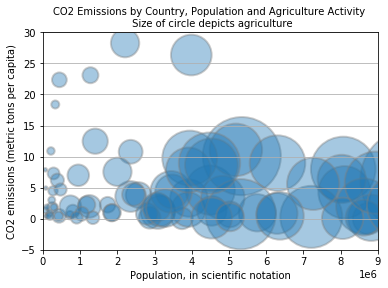

In [495]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, axis = plt.subplots()
axis.yaxis.grid(True)
axis.set_title('CO2 Emissions by Country, Population and Agriculture Activity \n Size of circle depicts agriculture',fontsize=10)
axis.set_xlabel('Population, in scientific notation',fontsize=10)
axis.set_ylabel('CO2 emissions (metric tons per capita)',fontsize=10)
y = plot_data2['CO2 emissions (metric tons per capita)']
z = plot_data2['TotalFood']
x = plot_data2['Population, total']

plt.scatter(x, y, s= z, cmap = 'Blues', alpha = 0.4, edgecolors = "grey", linewidth = 2)
plt.xlim(0,9e+6)
plt.ylim(-5, 30)
plt.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
plt.show()